In [1]:
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import auc
import scipy.stats as stats
from scipy.stats import zscore
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [4]:
df=pd.read_csv("H:\happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.shape

(158, 12)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
#observations
#No Nan's Present
#standard deviation< mean/average
#All except happiness rank are continuous data

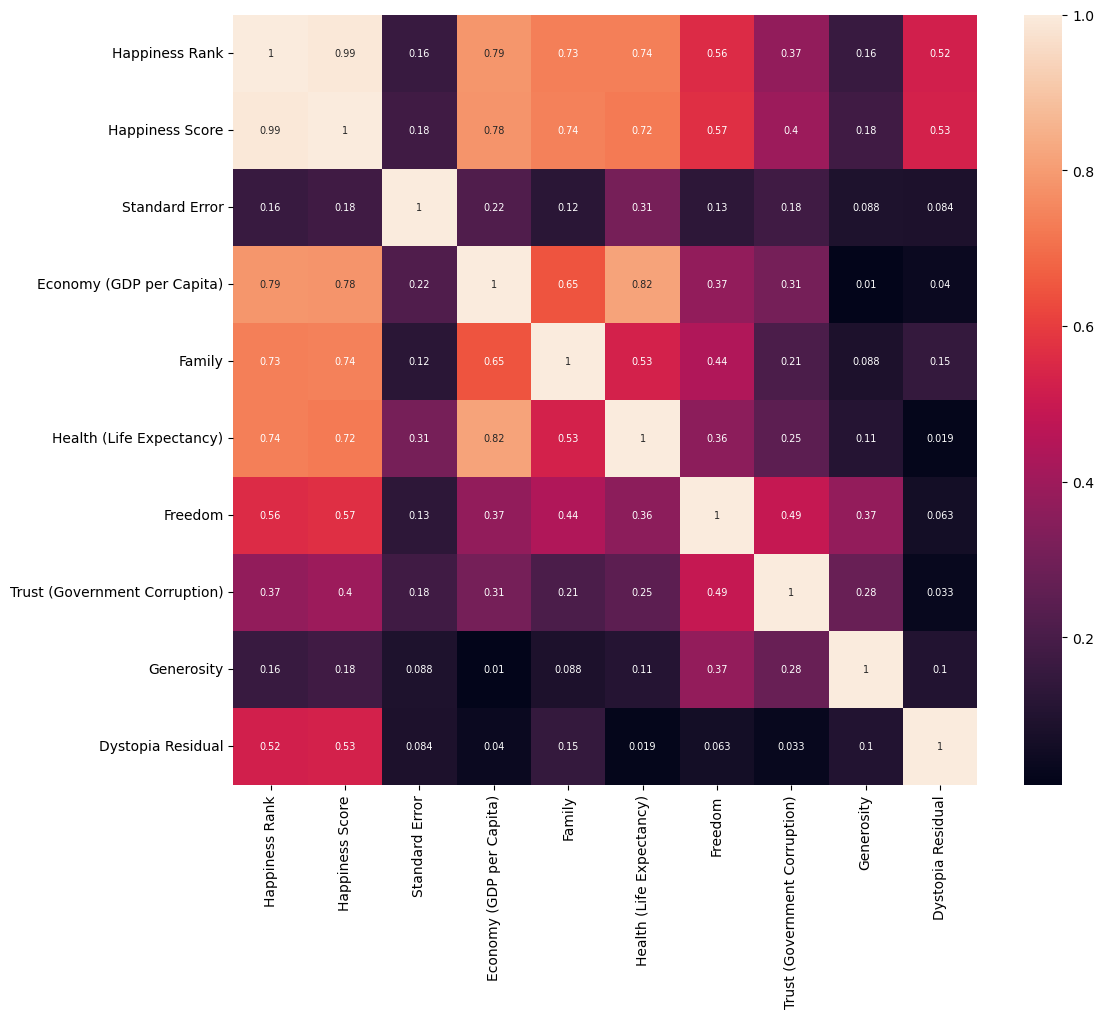

In [9]:
dfheat= df.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(dfheat, annot=True, annot_kws={'size':7})
plt.show()

In [ ]:
# As, we can observe in the heat map above:
#Economy(Per capita ),Family and Health are highly related to happiness

In [ ]:
#As there is no need of first two rows in furthur investigation ,Let's make a new dataframe

In [18]:
df1 = df.iloc[:,-10:]
df1

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


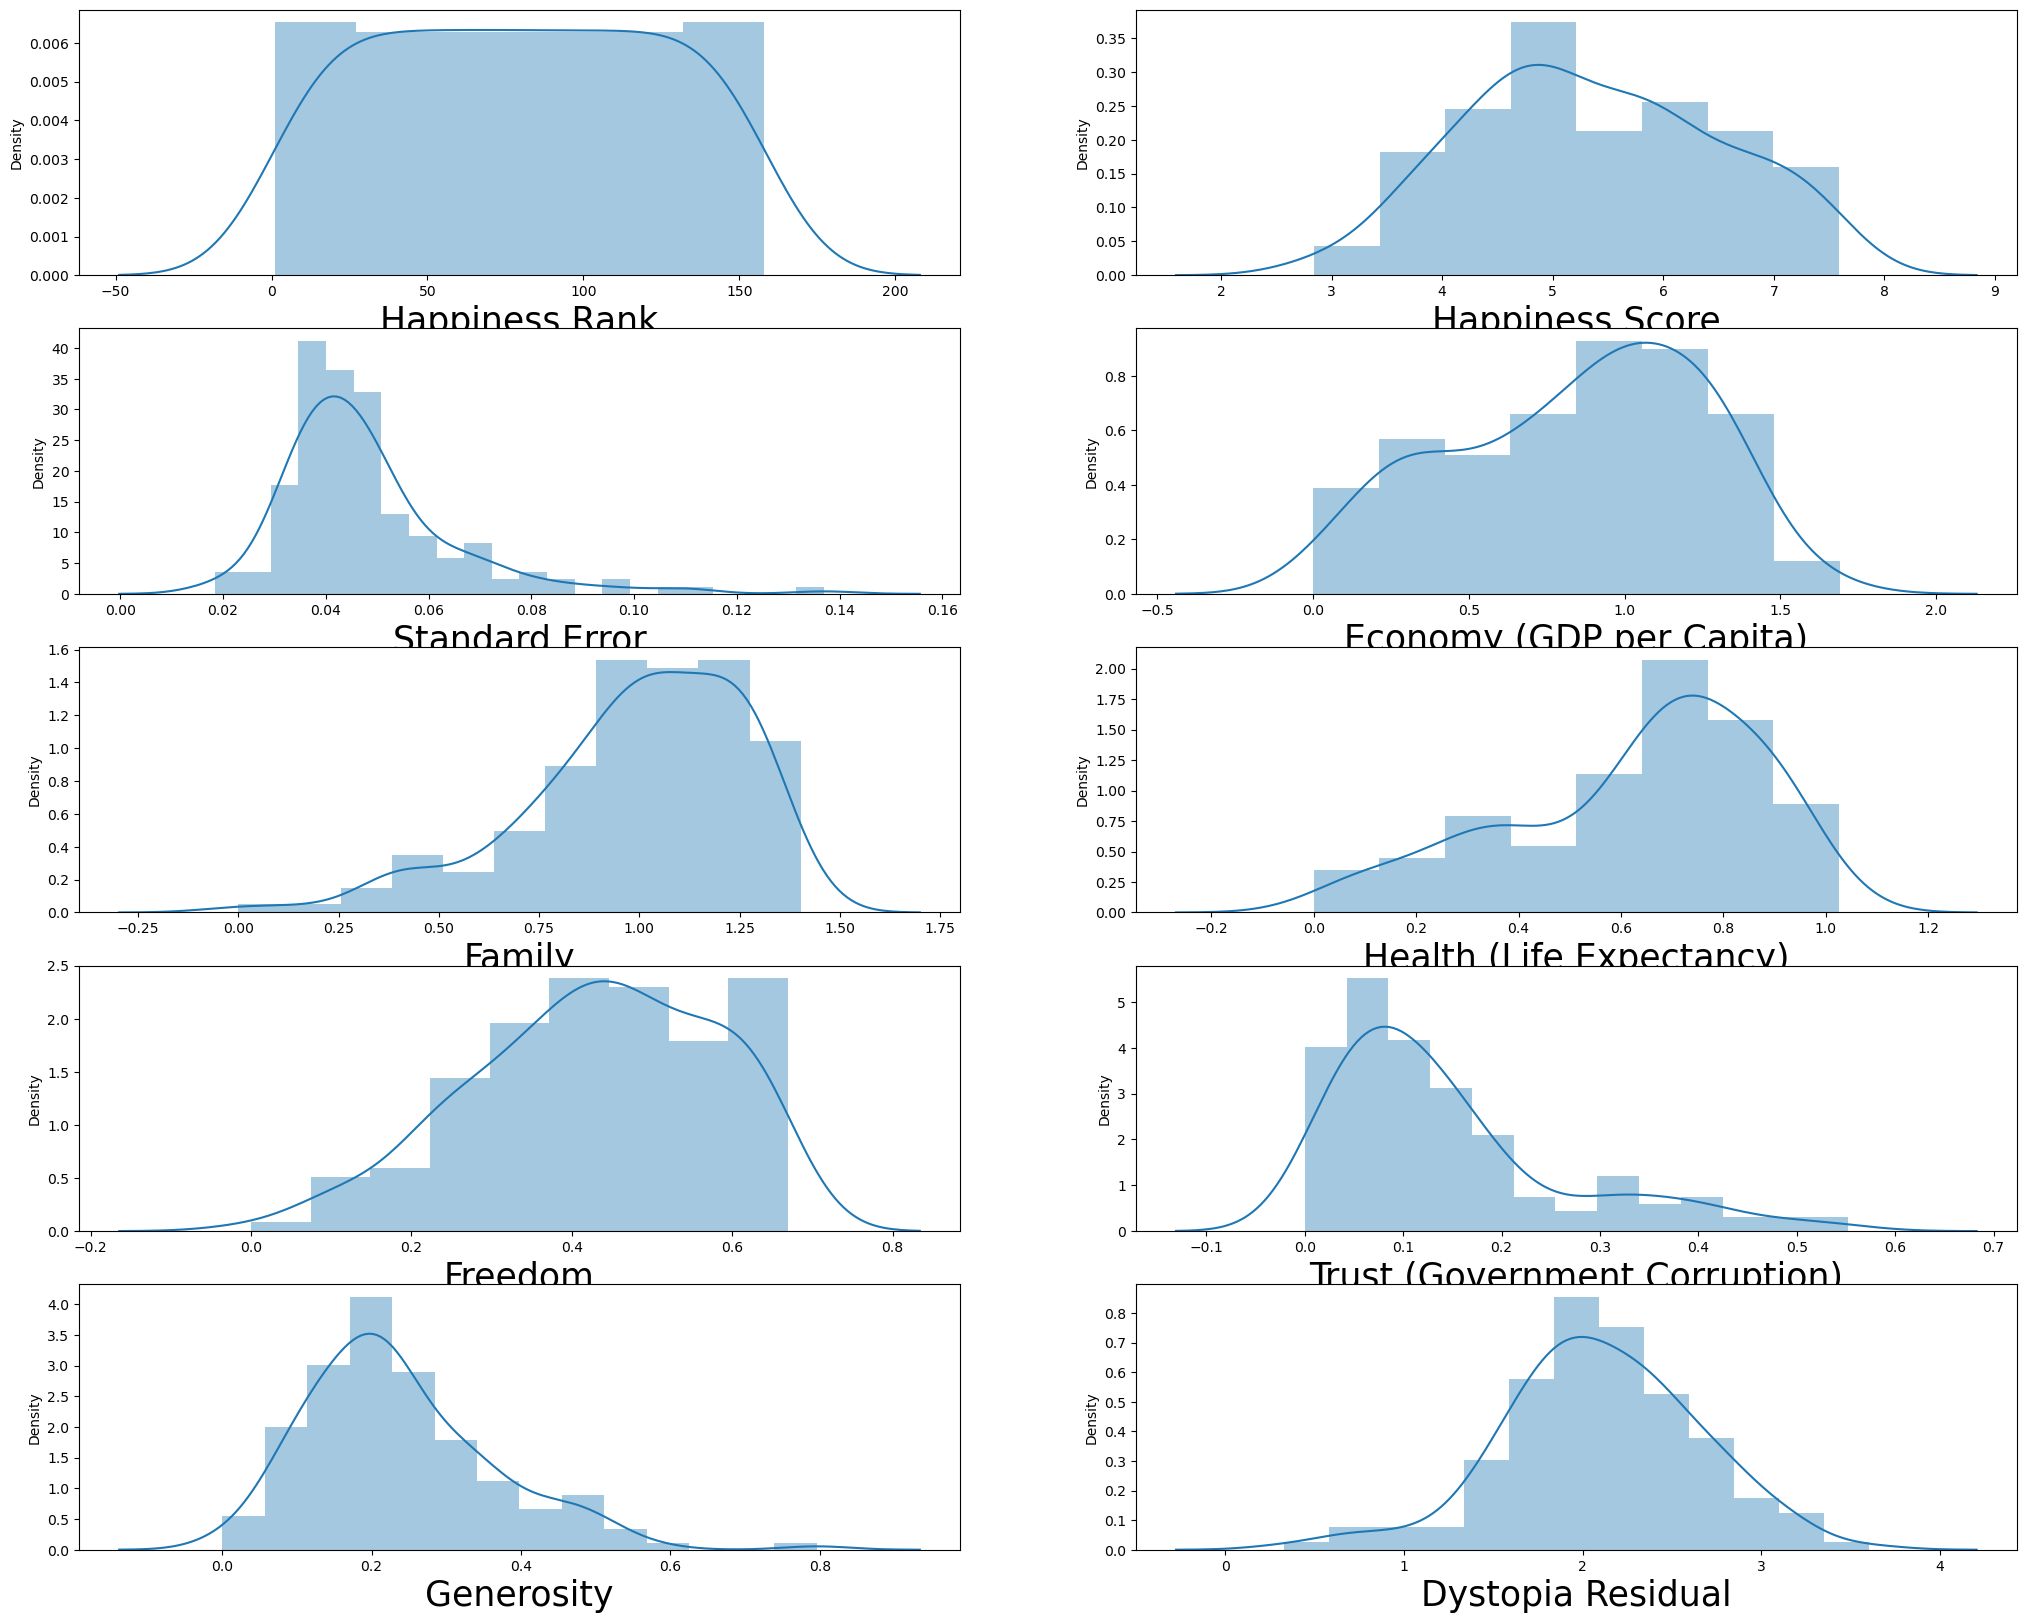

In [22]:
plt.figure(figsize=(25,20))
plot=1

for column in df1:
   if plot<=10:
       a=plt.subplot(5,2,plot)
       sns.distplot(df1[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

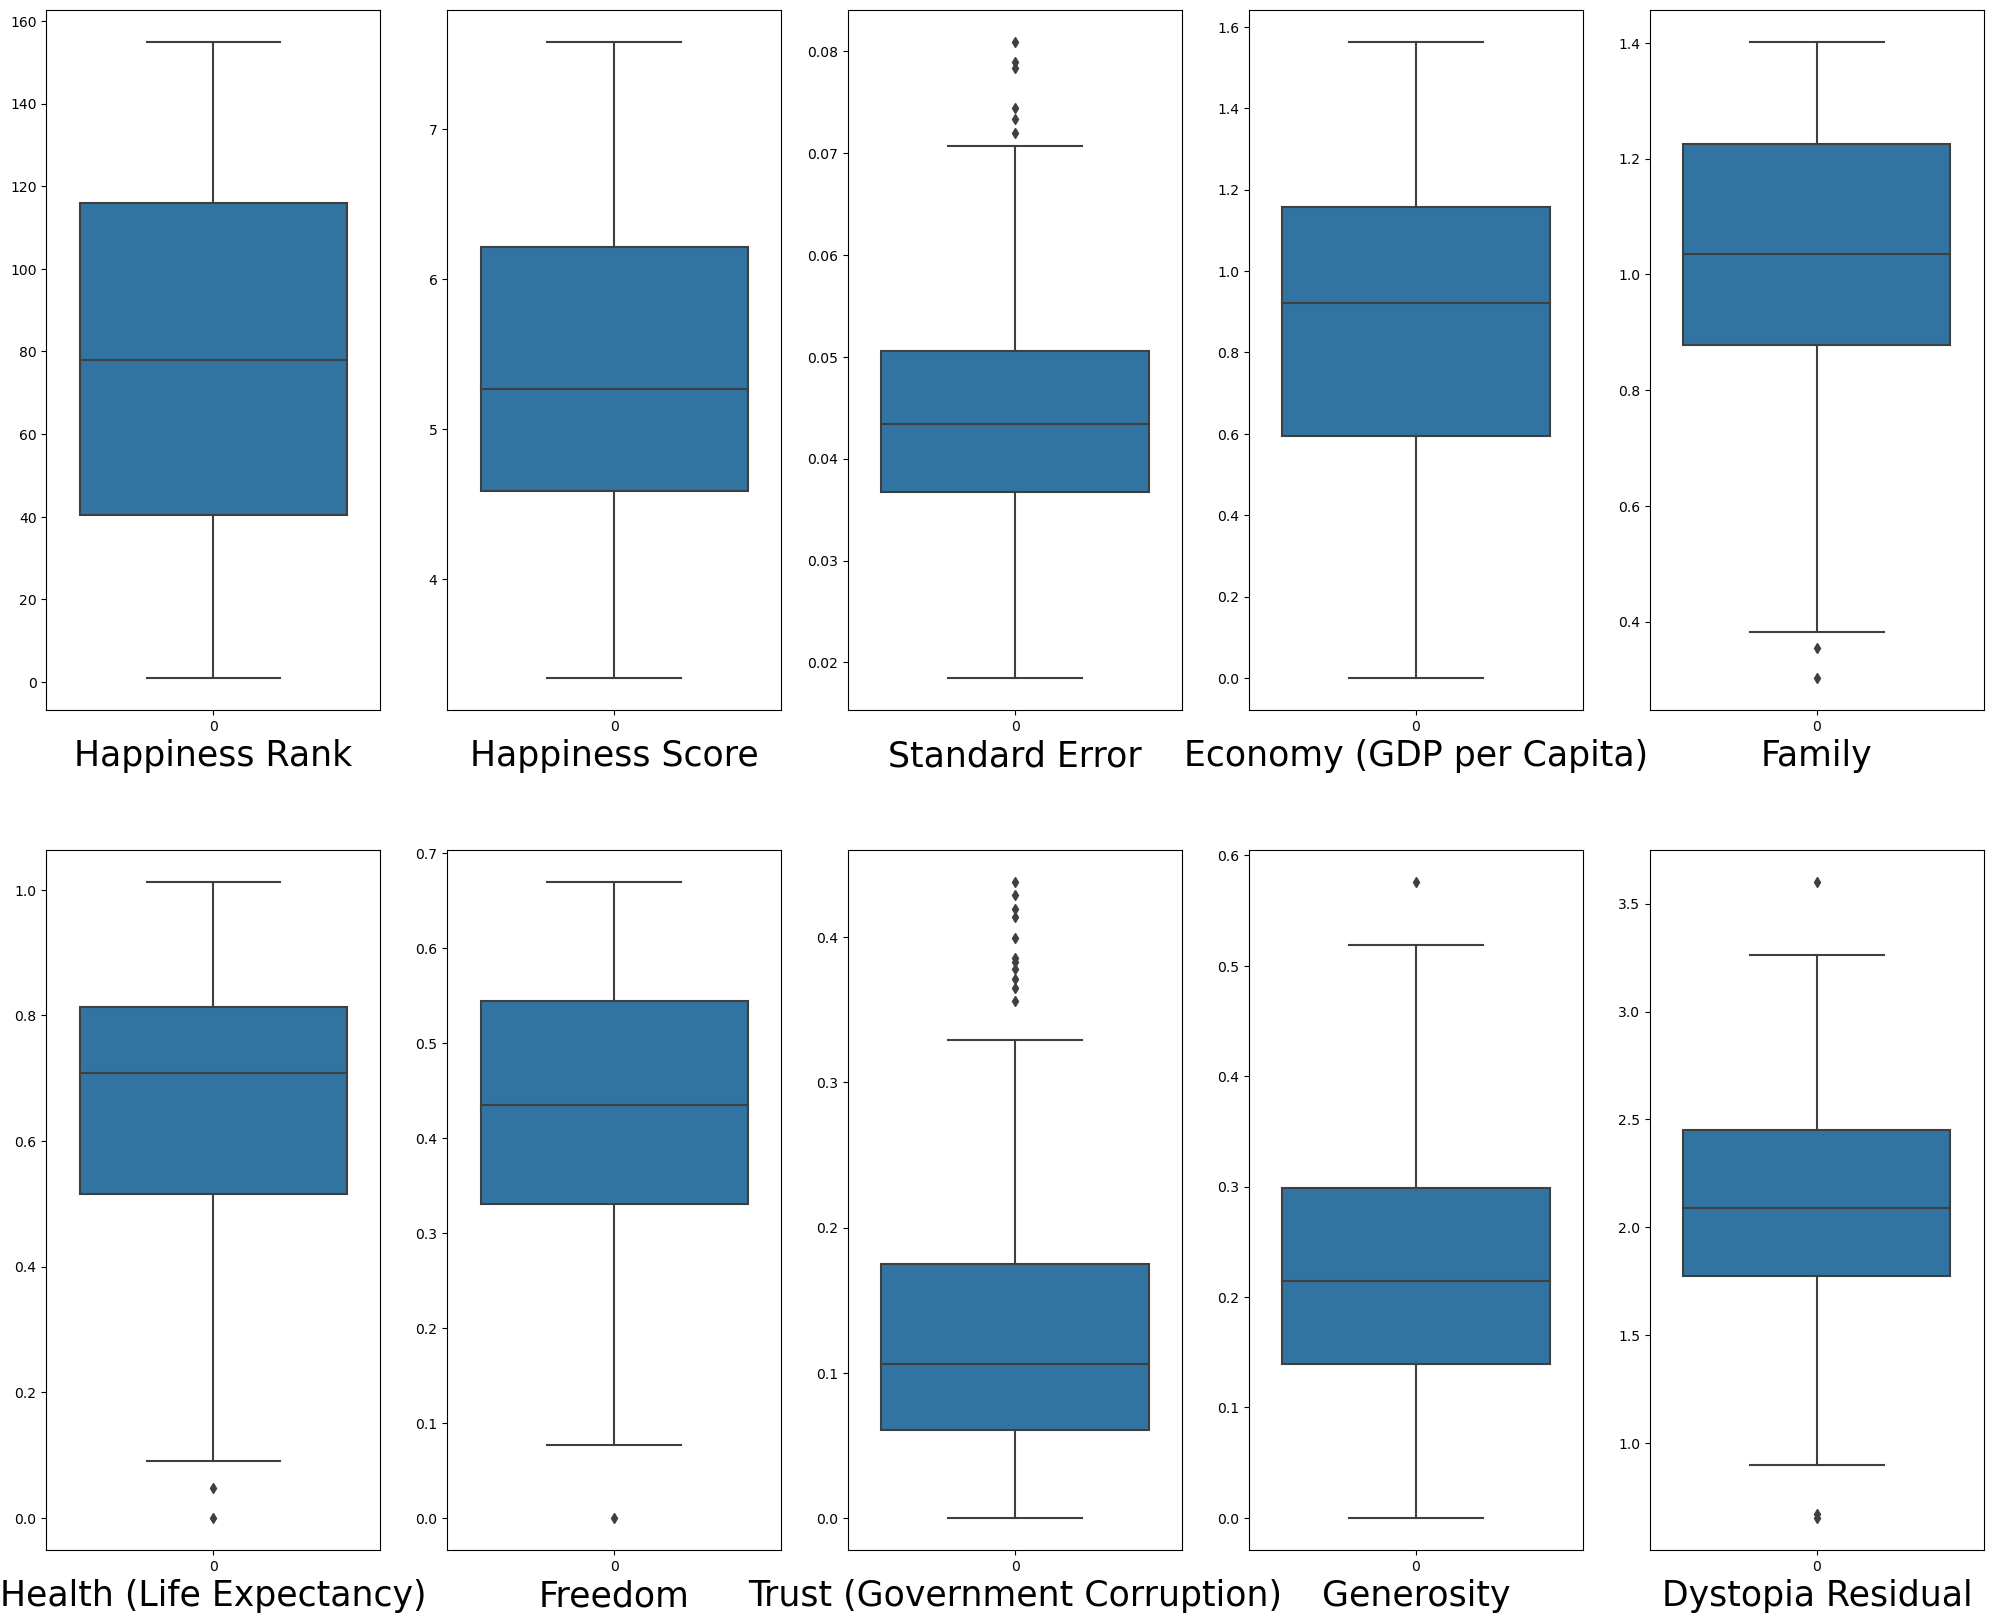

In [53]:
plt.figure(figsize=(25,20))
plot=1

for column in df1:
   if plot<=10:
       a=plt.subplot(2,5,plot)
       sns.boxplot(df1[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [ ]:
# As we can see, the outlier in 'Trust' is maximum
#Let;s try to remove it first

In [91]:
q3=df1.quantile(0.75)
q1=df1.quantile(0.25)
iqr=q3-q1
iqr

Happiness Rank                   63.00000
Happiness Score                   1.28400
Standard Error                    0.01444
Economy (GDP per Capita)          0.59128
Family                            0.30558
Health (Life Expectancy)          0.33401
Freedom                           0.18994
Trust (Government Corruption)     0.09114
Generosity                        0.14131
Dystopia Residual                 0.58012
dtype: float64

In [92]:
trus= (q3[7] + (1.5 * iqr[7]))
print(trus)

0.27905


In [93]:
row1=df1['Trust (Government Corruption)']


In [111]:
index= np.where(row1>trus)
print(index)
df2= df1.drop(df1.index[index])
df2.reset_index()


(array([81], dtype=int64),)


,index,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
1,26,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
2,28,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
3,30,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
4,31,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
...,...,...,...,...,...,...,...,...,...,...,...
97,148,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
98,149,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
99,150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
100,151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [112]:
df2 = df2.iloc[:,-10:]
df2

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
26,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
28,29,6.575,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
30,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
31,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
...,...,...,...,...,...,...,...,...,...,...
148,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


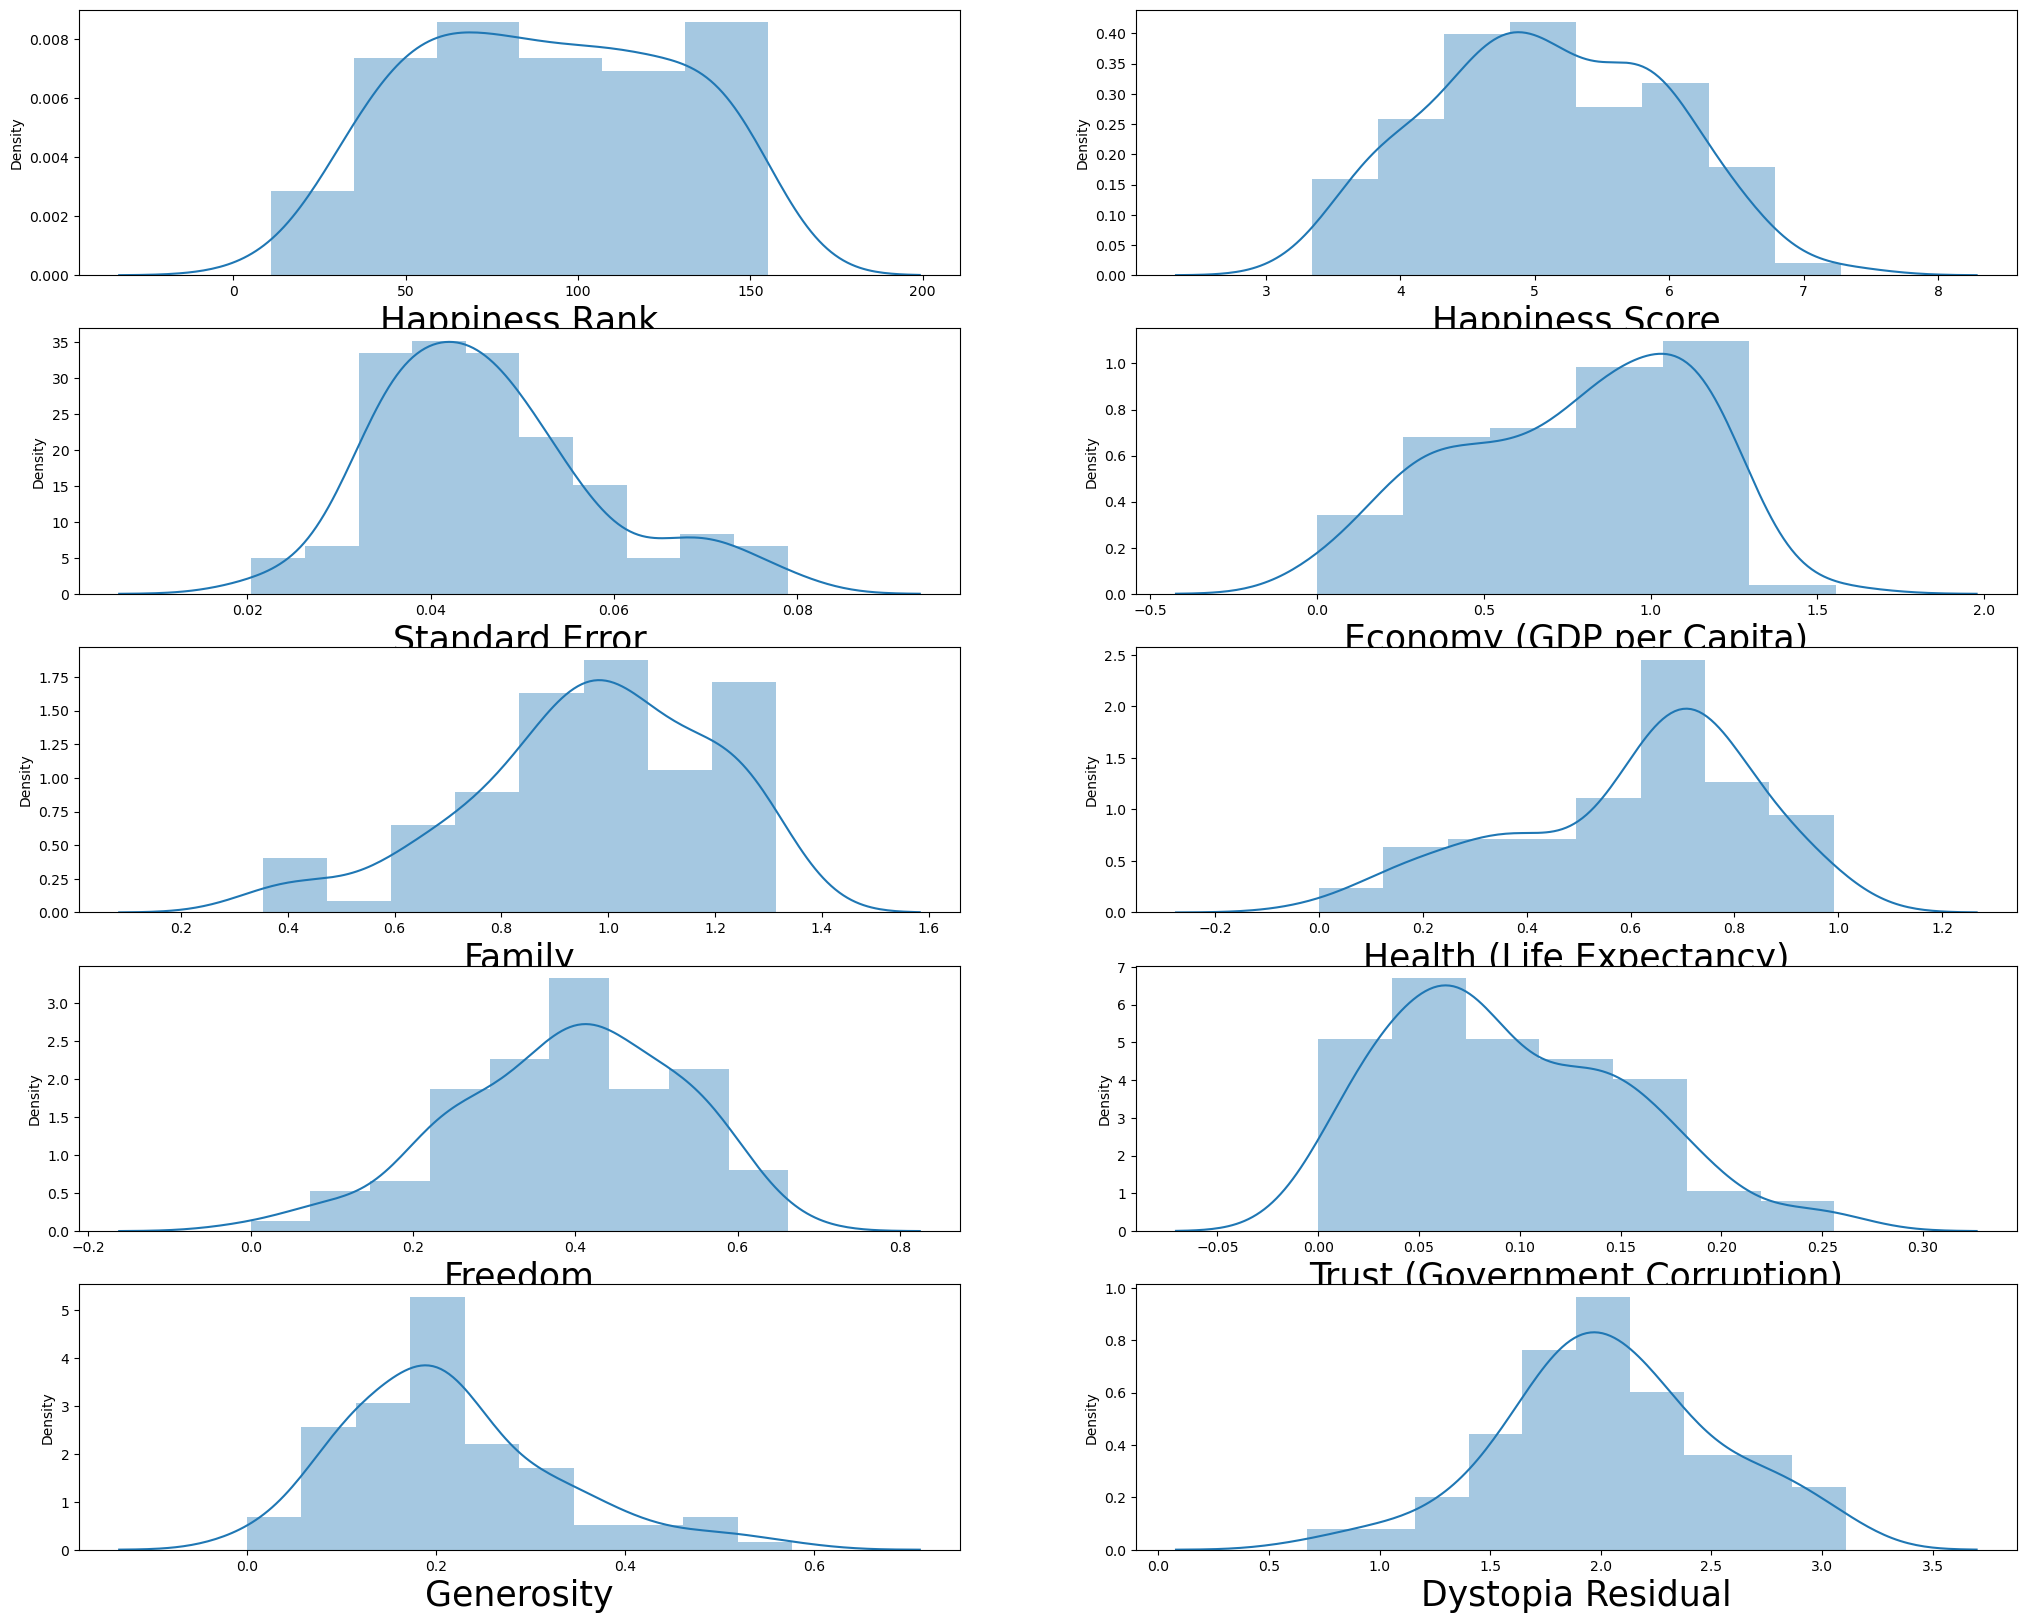

In [115]:
plt.figure(figsize=(25,20))
plot=1

for column in df2:
   if plot<=10:
       a=plt.subplot(5,2,plot)
       sns.distplot(df2[column])
       plt.xlabel(column, fontsize=25)
    
   plot +=1 
plt.show()

In [ ]:
#Now training the model

In [202]:
x1=df2.drop(columns=['Happiness Score'])
y1=df2['Happiness Score']
x1

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
10,11,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
26,27,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
28,29,0.03512,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
30,31,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
31,32,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
...,...,...,...,...,...,...,...,...,...
148,149,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,150,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [203]:
from sklearn.linear_model import LinearRegression
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.4, random_state = 40)
reg = LinearRegression()
reg.fit(x1_train, y1_train)


LinearRegression()

In [204]:
reg.score(x1_train,y1_train)

0.9999998954113419

In [205]:
reg.score(x1_test,y1_test)

0.9999998268693621

In [212]:
y_pred=reg.predict(x1_test)

In [213]:
y_pred

array([4.29264617, 4.51722906, 4.78656511, 5.97530082, 5.36032224,
       6.12281327, 5.28637887, 5.19240798, 5.33256536, 4.7879362 ,
       4.19434954, 6.4851762 , 5.12887751, 5.77040242, 4.51448695,
       5.88974881, 4.21837241, 5.60469601, 6.2947603 , 3.81917275,
       4.56489136, 4.69419999, 3.34007027, 4.68071106, 5.79051033,
       4.67743178, 4.50720066, 6.57509769, 4.51248665, 4.27062498,
       5.85516745, 5.68874058, 5.09753057, 7.27786744, 4.97118317,
       6.13022694, 5.42851483, 5.84754243, 5.1240983 , 6.45471059,
       4.79943309])

In [214]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=30,n_estimators=90)
rfmodel.fit(x1_train,y1_train)
y2_pred = rfmodel.predict(x1_test.values)

In [215]:
rfmodel.score(x1_test,y1_test)

0.9653730301612928

In [217]:
rfmodel.score(x1_train,y1_train)

0.9988256909535689

In [218]:
y2_pred=rfmodel.predict(x1_test)

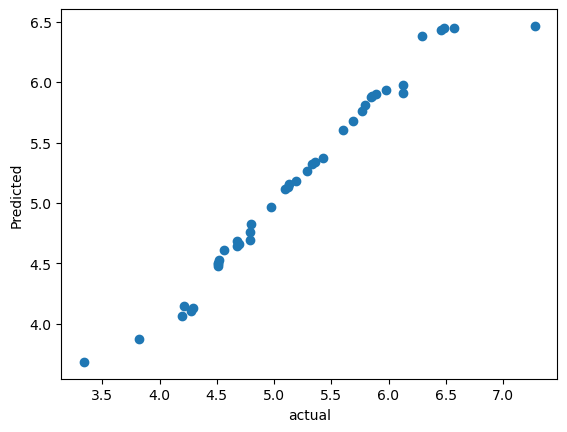

In [225]:
plt.scatter(y1_test,y2_pred)
plt.xlabel('actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
#Question -2 Answer

In [327]:
df3=pd.read_csv("F:/titanic_train.csv")
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [328]:
df3.shape

(891, 12)

In [329]:
df3.drop_duplicates(inplace=True)


In [330]:
df3.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [331]:
df3.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [332]:
#Here we have null/Nan values in age, cabin, embarked column

In [333]:
# takin average age for NaN in Age column
df3['Age'].fillna(df3['Age'].mean(), inplace = True)

In [334]:
#name,PassengerId, ticket are not a factor for survival
#so we can remove them
df3=df3.drop(columns=['Name','Ticket','PassengerId'])

In [335]:
#Let's replace sex(male)=1, female=0
df3['Sex'].replace({"male":1, "female":0}, inplace=True)  

In [336]:
#Let's use encoders for treating null of cabin column, as built quality of cabin can be a factor here
# also for embarked
from sklearn.preprocessing import LabelEncoder

In [337]:
lab= LabelEncoder()

In [338]:
dff= lab.fit_transform(df3['Cabin'])
dff2=lab.fit_transform(df3['Embarked'])

In [339]:
df3['Cabin']=dff
df3['Embarked']=dff2

In [340]:
df3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,130.744108,1.538721
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,36.024237,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,147.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,147.000000,3.000000


In [341]:
upperl= df3.SibSp.mean()+3*df3.SibSp.std()
lowerl=df3.SibSp.mean()-3*df3.SibSp.std()
print(upperl,lowerl)

3.8312381532214723 -2.785222440539093


In [342]:
upperl_1= df3.Parch.mean()+3*df3.Parch.std()
lowerl_1=df3.Parch.mean()-3*df3.Parch.std()
print(upperl_1,lowerl_1)

2.799765378316916 -2.0365779484628193


In [343]:
upperl_2= df3.Cabin.mean()+3*df3.Cabin.std()
lowerl_2=df3.Cabin.mean()-3*df3.Cabin.std()
print(upperl_2,lowerl_2)

238.81681999752487 22.671395490690614


In [344]:
upperl_3= df3.Fare.mean()+3*df3.Fare.std()
lowerl_3=df3.Fare.mean()-3*df3.Fare.std()
print(upperl_3,lowerl_3)

181.28449376011736 -116.87607782296807


In [345]:
df3[(df3.SibSp>upperl)|(df3.SibSp<lowerl)]
df3[(df3.Parch>upperl_1)|(df3.Parch<lowerl_1)]
df3[(df3.Cabin>upperl_2)|(df3.Cabin<lowerl_2)]
df3[(df3.Fare>upperl_3)|(df3.Fare<lowerl_3)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
27,0,1,1,19.000000,3,2,263.0000,63,2
88,1,1,0,23.000000,3,2,263.0000,63,2
118,0,1,1,24.000000,0,1,247.5208,36,0
258,1,1,0,35.000000,0,0,512.3292,147,0
299,1,1,0,50.000000,0,1,247.5208,36,0
311,1,1,0,18.000000,2,2,262.3750,35,0
341,1,1,0,24.000000,3,2,263.0000,63,2
377,0,1,1,27.000000,0,2,211.5000,79,0
380,1,1,0,42.000000,0,0,227.5250,147,0
438,0,1,1,64.000000,1,4,263.0000,63,2


In [350]:
no_outliers=df3[(df3.SibSp<upperl)&(df3.SibSp>lowerl)]
no_outliers=df3[(df3.Parch<upperl_1)&(df3.Parch>lowerl_1)]
no_outliers=df3[(df3.Cabin<upperl_2)&(df3.Cabin>lowerl_2)]
no_outliers=df3[(df3.Fare<upperl_3)&(df3.Fare>lowerl_3)]
df3=no_outliers

In [351]:
#No null present now
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [352]:
#Zscore method to remove outliers
from scipy.stats import zscore
score= zscore(df3)
absscore=np.abs(score)

filtering= (absscore<3).all(axis=1)
df3=df3[filtering]
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,147,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,147,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,147,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,147,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [353]:
df3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,147,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,147,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,147,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,147,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,147,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [354]:
df3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.369792,2.399740,0.669271,29.397145,0.348958,0.233073,21.660920,137.746094,1.563802
std,0.483063,0.778023,0.470782,11.785066,0.625907,0.537123,22.490684,24.441066,0.768406
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,0.000000,2.000000,0.000000,22.750000,0.000000,0.000000,7.895800,147.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.000000,147.000000,2.000000
75%,1.000000,3.000000,1.000000,34.000000,1.000000,0.000000,26.000000,147.000000,2.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,113.275000,147.000000,2.000000


In [ ]:
#Let's try iqr method

In [355]:
q3=df3.quantile(0.75)
q1=df3.quantile(0.25)
iqr=q3-q1
iqr

Survived     1.0000
Pclass       1.0000
Sex          1.0000
Age         11.2500
SibSp        1.0000
Parch        0.0000
Fare        18.1042
Cabin        0.0000
Embarked     1.0000
dtype: float64

In [357]:
Sib= (q3[6] + (1.5 * iqr[6]))
sib=(q3[6] - (1.5 * iqr[6]))
row=df3['Fare']



In [359]:
index= np.where(row>Sib)
print(index)
df3= df3.drop(df3.index[index])
df3.reset_index()

(array([  1,  28,  45,  52,  60,  62,  78,  82,  87, 102, 106, 121, 133,
       137, 146, 148, 184, 187, 193, 199, 213, 224, 225, 228, 238, 251,
       252, 264, 265, 267, 268, 286, 304, 313, 316, 320, 328, 334, 353,
       375, 390, 419, 421, 429, 436, 437, 441, 445, 452, 466, 469, 475,
       481, 499, 503, 506, 511, 532, 544, 557, 559, 568, 572, 577, 590,
       597, 603, 640, 651, 656, 661, 681, 707, 712, 720, 723, 733, 757],
      dtype=int64),)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,147,2
1,2,1,3,0,26.000000,0,0,7.9250,147,2
2,3,1,1,0,35.000000,1,0,53.1000,55,2
3,4,0,3,1,35.000000,0,0,8.0500,147,2
4,5,0,3,1,29.699118,0,0,8.4583,147,1
...,...,...,...,...,...,...,...,...,...,...
685,886,0,2,1,27.000000,0,0,13.0000,147,2
686,887,1,1,0,19.000000,0,0,30.0000,30,2
687,888,0,3,0,29.699118,1,2,23.4500,147,2
688,889,1,1,1,26.000000,0,0,30.0000,60,0


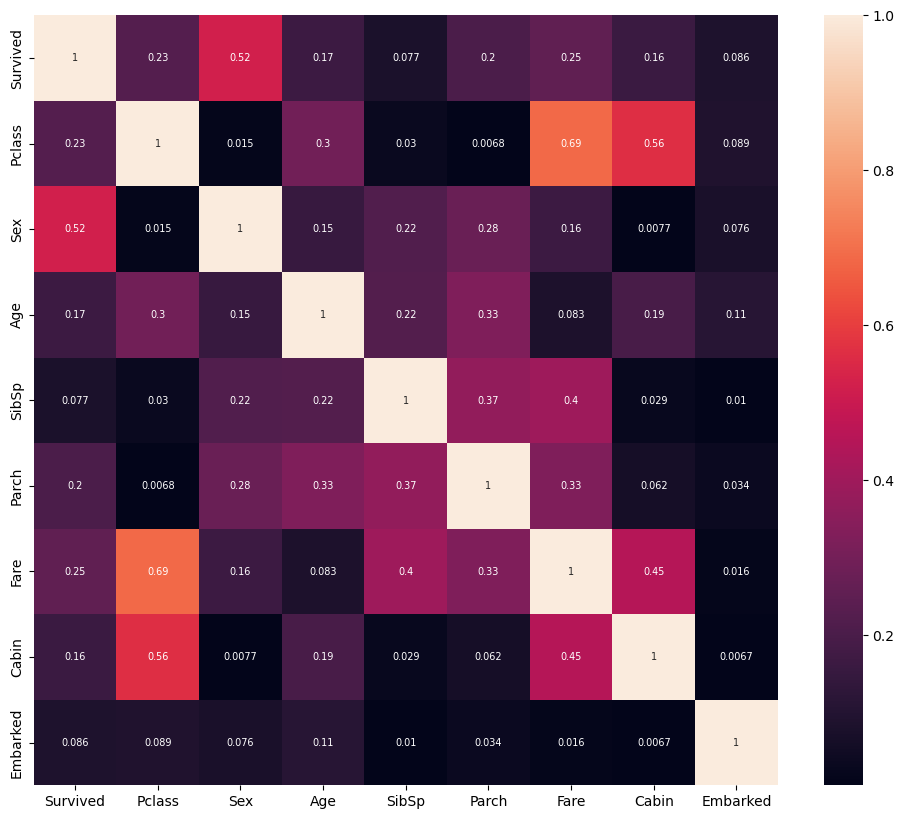

In [361]:
dfheat= df3.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(dfheat, annot=True, annot_kws={'size':7})
plt.show()

In [ ]:
#Model

In [374]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [368]:
x=df3.drop(columns=['Survived'])
y=df3['Survived']


In [369]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.70, random_state=58)


In [370]:
def score(model,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=model.predict(x_train)
        print('Train result')
        print(f"Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred=model.predict(x_test)
        print('Test result')
        print(f"Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('report',classification_report(y_test,pred,digits=2))

In [371]:
tree=DecisionTreeClassifier()
tree.fit(x_train,y_train) 

DecisionTreeClassifier()

In [372]:
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:98.55%
Test result
Accuracy score:74.95%
report               precision    recall  f1-score   support

           0       0.80      0.81      0.81       310
           1       0.65      0.64      0.65       173

    accuracy                           0.75       483
   macro avg       0.73      0.73      0.73       483
weighted avg       0.75      0.75      0.75       483



In [375]:
random_model=RandomForestClassifier()
random_model.fit(x_train,y_train)
score(tree,x_train, x_test, y_train, y_test, train=True)
score(tree,x_train, x_test, y_train, y_test, train=False)

Train result
Accuracy score:98.55%
Test result
Accuracy score:74.95%
report               precision    recall  f1-score   support

           0       0.80      0.81      0.81       310
           1       0.65      0.64      0.65       173

    accuracy                           0.75       483
   macro avg       0.73      0.73      0.73       483
weighted avg       0.75      0.75      0.75       483



In [381]:
from sklearn.model_selection import cross_val_score
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71428571 0.71428571 0.73170732 0.68292683 0.73170732]
0.7149825783972126
